# SULI Computational Workshop

[`astropy.units`]: https://docs.astropy.org/en/stable/units/index.html
[`plasmapy.particles`]: https://docs.plasmapy.org/en/stable/particles/index.html
[`plasmapy.formulary`]: https://docs.plasmapy.org/en/stable/formulary/index.html
[`plasmapy.dispersion`]: https://docs.plasmapy.org/en/stable/dispersion/index.html
[completed notebook]: https://github.com/PlasmaPy/SULI-2022/blob/main/tutorial_completed.ipynb
[GitHub repository]: https://github.com/PlasmaPy/SULI-2022
[2022 Introduction to Fusion Energy and Plasma Physics Course]: https://suli.pppl.gov/2022/course/
[PlasmaPy]: https://www.plasmapy.org
[PlasmaPy's Element chat]: https://app.element.io/#/room/#plasmapy:openastronomy.org

Welcome to the computational workshop at the [2022 Introduction to Fusion Energy and Plasma Physics Course]!  The goal of this workshop is to give an introduction to [PlasmaPy]: an open source community-developed Python package for plasma research and education.  

Today we'll start by going through [`astropy.units`], which is used quite heavily in PlasmaPy, SunPy, and many other packages in the scientific pythoniverse.  We'll then take a tour of [`plasmapy.particles`] and end with [`plasmapy.formulary`].  We will be filling out the notebook interactively during this session.

If you get stuck at any point, please feel free to ask in the Zoom chat, on Discord, or in [PlasmaPy's Element chat].  You can also refer to the the [completed notebook].

To execute a cell in a Jupyter notebook, press **Shift + Enter**.  

## Let's start with some preliminaries

Let's execute a few cells to get us ready for the tutorial.  If you end up having to restart the notebook, please run the cells in this section again.

**If you are on Google Colab**, run the next cell with Shift + Enter to install PlasmaPy. When the warning comes up, click **Run anyway**.  This may take ∼30 seconds.

In [ ]:
try:
  import google.colab
  IN_GOOGLE_COLAB = True
except ImportError:
  IN_GOOGLE_COLAB = False

if IN_GOOGLE_COLAB:
    try:
        import plasmapy
    except ImportError:
        %pip uninstall -y imgaug  # package conflict with matplotlib
        %pip install plasmapy==0.7.0
        exit()  # a trick to restart the runtime; might issue warning

You should not need to restart the runtime at this point, and some warning messages might show up.  

Run the next cell with Shift + Enter to perform some initial imports and settings.

In [ ]:
import numpy as np
import astropy.units as u
from astropy import constants as const
import matplotlib.pyplot as plt

from plasmapy.particles import *
from plasmapy.formulary import *
from plasmapy.formulary.radiation import *

import warnings
warnings.simplefilter(action='ignore')

# Enable plotting support for astropy.units
from astropy.visualization import quantity_support
quantity_support()

%matplotlib inline
%config InlineBackend.figure_formats = ['svg'] 

If the above cell doesn't work, try running a new cell with the following command to install PlasmaPy:

`%pip install plasmapy`

Then run the above cell again.

If you are running this on **Binder**, remember that the notebook will time out after 10 minutes of inactivity.

## Astropy units

In scientific computing, we often represent physical quantities as numbers.

[`astropy.units`]: https://docs.astropy.org/en/stable/units/index.html
[`plasmapy.particles`]: ../../particles/index.rst
[`plasmapy.formulary`]: ../../formulary/index.rst
[$327.6M errors]: https://en.wikipedia.org/wiki/Mars_Climate_Orbiter#Cause_of_failure

Representing a physical quantity as a number has risks. We might unknowingly perform operations with different units, like `time_in_seconds + time_in_hours`. We might even accidentally perform operations with physically incompatible units, like `length + time`, without catching our mistake. We can avoid these problems (and potentially [$327.6M errors]) by using a units package.

This notebook introduces [`astropy.units`] with an emphasis on the functionality needed to work with [`plasmapy.particles`] and [`plasmapy.formulary`]. We typically import this subpackage as `u`.

In [ ]:
import astropy.units as u

## Unit essentials

We can create a physical quantity by multiplying or dividing a number or array with a unit.

[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity

This operation creates a [`Quantity`]: a number, sequence, or array that has been assigned a physical unit.

[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity

We can also create an object by using the [`Quantity`] class itself.

[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity

We can create [`Quantity`] objects with compound units.

[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity

We can even create [`Quantity`] objects that are explicitly dimensionless.

[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity

We can also create a [`Quantity`] based off of a NumPy array or a list.

## Unit operations

[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity

Operations between [`Quantity`] objects handle unit conversions automatically. We can add [`Quantity`] objects together as long as their units have the same physical type.

Units get handled automatically during operations like multiplication, division, and exponentiation.

Attempting an operation between physically incompatible units gives us an error, which we can use to find bugs in our code.

[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity
[`numpy.ndarray`]: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html

[`Quantity`] objects behave very similarly to NumPy arrays because [`Quantity`] is a subclass of [`numpy.ndarray`].

[NumPy]: https://numpy.org/
[SciPy]: https://scipy.org/

[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity
[Quantity objects lose their units with some operations]: https://docs.astropy.org/en/stable/known_issues.html#quantities-lose-their-units-with-some-operations

Most frequently encountered [NumPy] and [SciPy] functions can be used with [`Quantity`] objects.  However, [Quantity objects lose their units with some operations].  

## Unit conversions

[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity
[`to()`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity.to

The [`to()`] method allows us to convert a [`Quantity`] to different units of the same physical type. This method accepts strings that represent a unit (including compound units) or a unit object.

[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity
[`si`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity.si
[`cgs`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity.cgs

The [`si`] and [`cgs`] attributes convert the [`Quantity`] to SI or CGS units, respectively. 

## Detaching units and values

[`value`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity.value 
[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity

The [`value`] attribute of a [`Quantity`] provides the number (as a NumPy scalar) or NumPy array without the unit.

[`unit`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity.unit
[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity

The [`unit`] attribute of a [`Quantity`] provides the unit without the value.

## Equivalencies

[electron-volt]: https://en.wikipedia.org/wiki/Electronvolt
[Boltzmann constant]: https://en.wikipedia.org/wiki/Boltzmann_constant

Plasma scientists often use the [electron-volt] (eV) as a unit of temperature. This is a shortcut for describing the thermal energy per particle, or more accurately the temperature multiplied by the [Boltzmann constant], $k_B$. Because an electron-volt is a unit of energy rather than temperature, we cannot directly convert electron-volts to kelvin.

[`astropy.units`]: https://docs.astropy.org/en/stable/units/index.html
[equivalencies]: https://docs.astropy.org/en/stable/units/equivalencies.html
[`temperature_energy()`]: https://docs.astropy.org/en/stable/units/equivalencies.html#temperature-energy-equivalency

To handle non-standard unit conversions, [`astropy.units`] allows the use of [equivalencies]. The conversion from eV to K can be done by using the [`temperature_energy()`] equivalency.

[`dimensionless_angles()`]: https://docs.astropy.org/en/stable/api/astropy.units.equivalencies.dimensionless_angles.html#dimensionless-angles

[frequency]: https://en.wikipedia.org/wiki/Frequency
[angular frequency]: https://en.wikipedia.org/wiki/Angular_frequency

Radians are treated dimensionlessly when the [`dimensionless_angles()`] equivalency is in effect. Note that this equivalency does not account for the multiplicative factor of $2π$ that is used when converting between [frequency] and [angular frequency].

## Physical constants

[`astropy.constants`]: https://docs.astropy.org/en/stable/constants/index.html

We can use [`astropy.constants`] to access the most commonly needed physical constants.

In [ ]:
from astropy.constants import c, e, eps0, hbar, k_B, mu0

print(c)

[`Constant`]: https://docs.astropy.org/en/stable/api/astropy.constants.Constant.html#astropy.constants.Constant
[`Quantity`]: https://docs.astropy.org/en/stable/api/astropy.units.Quantity.html#astropy.units.Quantity
[`u.temperature_energy()`]: https://docs.astropy.org/en/stable/units/equivalencies.html#temperature-energy-equivalency

A [`Constant`] behaves very similarly to a [`Quantity`]. For example, we can use the Boltzmann constant to mimic the behavior of [`u.temperature_energy()`].

Electromagnetic constants often need the unit system to be specified. Code within PlasmaPy uses SI units.

## Physical types

[physical type]: https://docs.astropy.org/en/stable/units/physical_types.html
[`physical_type`]: https://docs.astropy.org/en/stable/api/astropy.units.UnitBase.html#astropy.units.UnitBase.physical_type
[`get_physical_type()`]: https://docs.astropy.org/en/stable/api/astropy.units.get_physical_type.html#astropy.units.get_physical_type

A [physical type] corresponds to physical quantities with dimensionally compatible units. Astropy has functionality that represents different physical types. These physical type objects can be accessed using either the [`physical_type`] attribute of a unit or [`get_physical_type()`].

These physical type objects can be used for dimensional analysis.

## Particles

[`plasmapy.particles`]: ../../particles/index.rst

The [`plasmapy.particles`] subpackage contains functions to access basic particle data, and classes to represent particles.

### Particle properties

[representation of a particle]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.ParticleLike.html#particlelike

There are several functions that provide information about different particles that might be present in a plasma. The input of these functions is a [representation of a particle], such as a string for the atomic symbol or the element name.

[atomic number]: https://en.wikipedia.org/wiki/Atomic_number

We can provide a number that represents the [atomic number].

We can also provide standard symbols or the names of particles.

[alpha particle]: https://en.wikipedia.org/wiki/Alpha_particle

The symbols for many particles can even be used directly, such as for an [alpha particle]. To create an "α" in a Jupyter notebook, type `\alpha` and press tab.

[mass number]: https://en.wikipedia.org/wiki/Mass_number
[`Quantity`]: https://docs.astropy.org/en/stable/units/quantity.html#quantity
[`astropy.units`]: https://docs.astropy.org/en/stable/units/index.html

We can represent isotopes with the atomic symbol followed by a hyphen and the [mass number]. Let's use `half_life` to return the half-life of a radioactive particle in seconds as a [`Quantity`].

We typically represent an ion in a string by putting together the atomic symbol or isotope symbol, a space, the charge number, and the sign of the charge.

[particle-like]: https://docs.plasmapy.org/en/latest/glossary.html#term-particle-like
[`plasmapy.particles`]: https://docs.plasmapy.org/en/stable/particles/index.html

Functions in [`plasmapy.particles`] are quite flexible in terms of string inputs representing particles. An input is [particle-like] if it can be used to represent a physical particle.  

Most of these functions take additional arguments, with `Z` representing the charge number of an ion and `mass_numb` representing the mass number of an isotope. These arguments are often [keyword-only](https://docs.plasmapy.org/en/latest/glossary.html#term-keyword-only) to avoid ambiguity.

### Particle objects

[`Particle`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.Particle.html#plasmapy.particles.particle_class.Particle

Up until now, we have been using functions that accept representations of particles and then return particle properties. With the [`Particle`] class, we can create objects that represent physical particles.

[`Particle`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.Particle.html#plasmapy.particles.particle_class.Particle

Particle properties can be accessed via attributes of the [`Particle`] class.

#### Antiparticles

[`Particle`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.Particle.html#plasmapy.particles.particle_class.Particle
[`antiparticle`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.Particle.html#plasmapy.particles.particle_class.Particle.antiparticle

We can get antiparticles of fundamental particles by using the [`antiparticle`] attribute of a [`Particle`].

[`Particle`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.Particle.html#plasmapy.particles.particle_class.Particle

We can also use the tilde (`~`) operator on a [`Particle`] to get its antiparticle.

#### Ionization and recombination

[`ionize()`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.Particle.html#plasmapy.particles.particle_class.Particle.ionize
[`recombine()`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.Particle.html#plasmapy.particles.particle_class.Particle.recombine
[`Particle`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.Particle.html#plasmapy.particles.particle_class.Particle

The [`recombine()`] and [`ionize()`] methods of a [`Particle`] representing an ion or neutral atom will return a different [`Particle`] with fewer or more electrons.

When provided with a number, these methods tell how many bound electrons to add or remove.

[`True`]: https://docs.python.org/3/library/constants.html?highlight=true#True
[`Particle`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.Particle.html#plasmapy.particles.particle_class.Particle

If the `inplace` keyword is set to [`True`], then the [`Particle`] will be replaced with the new particle.


### Custom particles

[`CustomParticle`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.CustomParticle.html#plasmapy.particles.particle_class.CustomParticle

Sometimes we want to use a particle with custom properties.  For example, we might want to represent an average ion in a multi-species plasma.  For that we can use [`CustomParticle`].

[`CustomParticle`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.CustomParticle.html#plasmapy.particles.particle_class.CustomParticle
[`Particle`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.Particle.html#plasmapy.particles.particle_class.Particle

Many of the attributes of [`CustomParticle`] are the same as in [`Particle`].

[`numpy.nan`]: https://numpy.org/doc/stable/reference/constants.html#numpy.nan

If we do not include one of the physical quantities, it gets set to [`numpy.nan`] (not a number) in the appropriate units.

[`CustomParticle`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.CustomParticle.html#plasmapy.particles.particle_class.CustomParticle
[`plasmapy.formulary`]: https://docs.plasmapy.org/en/stable/formulary/index.html

[`CustomParticle`] objects are not yet able to be used by many of the functions in [`plasmapy.formulary`], but are expected to become compatible with them in PlasmaPy 0.9.0.

### Particle lists

[`ParticleList`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_collections.ParticleList.html
[`CustomParticle`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.CustomParticle.html#plasmapy.particles.particle_class.CustomParticle
[`Particle`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.Particle.html#plasmapy.particles.particle_class.Particle

The [`ParticleList`] class is a container for [`Particle`] and [`CustomParticle`] objects.

[`ParticleList`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_collections.ParticleList.html

By using a [`ParticleList`], we can access the properties of multiple particles at once.

[`ParticleList`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_collections.ParticleList.html
[`CustomParticle`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.CustomParticle.html#plasmapy.particles.particle_class.CustomParticle
[`Particle`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.Particle.html#plasmapy.particles.particle_class.Particle

We can also create a [`ParticleList`] by adding [`Particle`] and/or [`CustomParticle`] objects together.

We can also get an average particle.

[`ParticleList`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_collections.ParticleList.html
[`plasmapy.formulary`]: https://docs.plasmapy.org/en/stable/formulary/index.html

[`ParticleList`] objects are also expected to become compatible with many functions in [`plasmapy.formulary`] by PlasmaPy's 0.9.0 release.

### Particle categorization

[`Particle`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.Particle.html#plasmapy.particles.particle_class.Particle
[`categories`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.Particle.html#plasmapy.particles.particle_class.Particle.categories

The [`categories`] attribute of a [`Particle`] provides a set of the categories that the [`Particle`] belongs to.

[`is_category()`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.Particle.html#plasmapy.particles.particle_class.Particle.is_category
[`Particle`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.Particle.html#plasmapy.particles.particle_class.Particle

The [`is_category()`] method lets us determine if a [`Particle`] belongs to one or more categories.

[`Particle`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.Particle.html#plasmapy.particles.particle_class.Particle

If we need to be more specific, we can use the `require` keyword for categories that a [`Particle`] must belong to, the `exclude` keyword for categories that the [`Particle`] cannot belong to, and the `any_of` keyword for categories of which a [`Particle`] needs to belong to at least one.

[`Particle`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.Particle.html#plasmapy.particles.particle_class.Particle
[`is_category()`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.Particle.html#plasmapy.particles.particle_class.Particle.is_category

The `valid_categories` attribute of [`is_category()`] for any [`Particle`] gives a set containing all valid categories.

[`is_category()`]: https://docs.plasmapy.org/en/latest/api/plasmapy.particles.particle_collections.ParticleList.html#plasmapy.particles.particle_collections.ParticleList.is_category
[`ParticleList`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_collections.ParticleList.html

In the next release of PlasmaPy, there will be an [`is_category()`] method on [`ParticleList`] too.

### Creating functions with particle inputs

[`@particle_input`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.decorators.particle_input.html?#particle-input
[decorator]: https://realpython.com/primer-on-python-decorators/
[`Particle`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.Particle.html#plasmapy.particles.particle_class.Particle

It's often the case that we'll want to write functions that depend on particles. For this need, we can use [`@particle_input`]. This [decorator] processes arguments that have an annotation of [`Particle`]. Let's write a function `f` to try this out.

Let's pass this function a string that represents a proton.

[`@particle_input`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.decorators.particle_input.html?#particle-input
[`Particle`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.particle_class.Particle.html#plasmapy.particles.particle_class.Particle

Here, `"proton"` was transformed by [`@particle_input`] into a [`Particle`] before being passed into the function.

### Nuclear reactions

[`plasmapy.particles`]: https://docs.plasmapy.org/en/stable/particles/index.html

We can use [`plasmapy.particles`] to calculate the energy of a nuclear reaction using the `>` operator.  

If the nuclear reaction is invalid, then an exception is raised that states the reason why.

### Ionization state data structures

[`IonizationState`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.ionization_state.IonizationState.html#plasmapy.particles.ionization_state.IonizationState

The ionization state distribution for an element refers to the fractions of that element at each ionic level.  For example, the charge state of helium might be 10% He$^{0+}$, 70% He$^{1+}$, and 20% He$^{2+}$. Let's store this information in an [`IonizationState`] object, and specify the number density of the element too.

[`ionic_fractions`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.ionization_state.IonizationState.html#plasmapy.particles.ionization_state.IonizationState.ionic_fractions

The ionization state distribution is stored in the [`ionic_fractions`] attribute.

Because we provided the number density of the element as a whole, we can get back the number density of each ionic level.

We can also get the electron density under the assumption of quasineutrality.

[`summarize()`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.ionization_state.IonizationState.html#plasmapy.particles.ionization_state.IonizationState.summarize

We can use the [`summarize()`] method to get information about the ionization state.

[Gilbert et al. (2012)]: https://doi.org/10.1088/0004-637X/751/1/20
[coronal mass ejection]: https://en.wikipedia.org/wiki/Coronal_mass_ejection
[Advanced Composition Explorer]: https://en.wikipedia.org/wiki/Advanced_Composition_Explorer

Now let's look at some actual ionization state data for filament material in an interplanetary [coronal mass ejection] (CME) observed by the [Advanced Composition Explorer] (ACE) near 1 AU, averaged over about an hour.  The data were extracted from Figure 4 in [Gilbert et al. (2012)].  These data are noteworthy because there is information from very low charge states to very high charge states.

In [ ]:
number_densities = {
    "C": [0, 5.7e-7, 4.3e-5, 3.6e-6, 2.35e-6, 1e-6, 1.29e-6] * u.cm ** -3,
    "O": [0, 1.2e-7, 2.2e-4, 7.8e-6, 8.8e-7, 1e-6, 4e-6, 1.3e-6, 1.2e-7] * u.cm ** -3,
    "Fe": [
        0, 0, 1.4e-8, 1.1e-7, 2.5e-7, 2.2e-7, 1.4e-7, 1.2e-7, 2.1e-7,
        2.1e-7, 1.6e-7, 8e-8, 6.3e-8, 4.2e-8, 2.5e-8, 2.3e-8, 1.5e-8,
        3.1e-8, 6.1e-9, 2.3e-9, 5.3e-10, 2.3e-10, 0, 0, 0, 0, 0,
    ] * u.cm ** -3
}

[`IonizationStateCollection`]: https://docs.plasmapy.org/en/stable/api/plasmapy.particles.ionization_state_collection.IonizationStateCollection.html#plasmapy.particles.ionization_state_collection.IonizationStateCollection

Now let's use this information as an input for [`IonizationStateCollection`]: a data structure for the ionization states of multiple elements.

We can summarize this information too, but let's specify the minimum ionic fraction to print.

Now let's visualize the ionization state for each of these elements, remembering that these values were averaged over about an hour.

**Question: Does this plasma look like it all came from the same temperature?**

## PlasmaPy formulary

[`plasmapy.formulary`]: https://docs.plasmapy.org/en/stable/formulary/index.html

The [`plasmapy.formulary`] subpackage contains a broad variety of formulas needed by plasma scientists across disciplines, in particular to calculate plasma parameters.

### Plasma beta in the solar atmosphere

[Plasma beta]: https://en.wikipedia.org/wiki/Beta_(plasma_physics)

[Plasma beta] ($β$) is one of the most fundamental plasma parameters. $β$ is the ratio of the thermal plasma pressure to the magnetic pressure:

$$β = \frac{p_{therm}}{p_{mag}}.$$

How a plasma behaves depends strongly on $β$. When $β ≫ 1$, the magnetic field is not strong enough to significantly alter the dynamics, so the plasma motion is more gas-like. When $β ≪ 1$, magnetic tension and magnetic pressure dominate the dynamics. 

Let's use [`plasmapy.formulary.beta`](https://docs.plasmapy.org/en/stable/api/plasmapy.formulary.dimensionless.beta.html#plasmapy.formulary.dimensionless.beta) to compare $β$ in different parts of the solar atmosphere.

#### Solar corona

Let's start by defining some plasma parameters for an active region in the solar [corona](https://en.wikipedia.org/wiki/Stellar_corona).

[`beta`]: https://docs.plasmapy.org/en/stable/api/plasmapy.formulary.dimensionless.beta.html#plasmapy.formulary.dimensionless.beta

When we use these parameters in [`beta`](https://docs.plasmapy.org/en/stable/api/plasmapy.formulary.dimensionless.beta.html#plasmapy.formulary.dimensionless.beta), we find that $β$ is quite small which implies that the corona is magnetically dominated.

#### Solar chromosphere

Next let's calculate $β$ for the [chromosphere](https://en.wikipedia.org/wiki/Chromosphere). [Bogod et al. (2015)](https://doi.org/10.1007/s11207-014-0526-6) found that the quiet chromosphere ranges from ∼40–200 G.  We can get the temperature and number density of hydrogen from model C7 of [Avrett & Loeser (2007)](https://doi.org/10.1086/523671) for 1 Mm above the photosphere.

When $B$ is small, plasma $β$ is not too far from 1, which means that both magnetic and plasma pressure gradient forces are important when the chromospheric magnetic field is relatively weak. When near the higher range of $B$, $β$ is small so that the magnetic forces are more important than plasma pressure gradient forces.

#### Quiet solar photosphere

Let's specify some characteristic plasma parameters for the solar [photosphere](https://en.wikipedia.org/wiki/Photosphere).

When we calculate β for the photosphere, we find that it is an order of magnitude larger than 1, so plasma pressure gradient forces are more important than magnetic forces.

#### Sunspot photosphere

The magnetic field in the solar photosphere is strongest in [sunspots](https://en.wikipedia.org/wiki/Sunspot), so we would expect β to be lowest there. Let's estimate some plasma parameters for a sunspot.

When we calculate β, we find that both pressure gradient and magnetic forces will be important.

### Plasma parameters in Earth's magnetosphere

[magnetic reconnection]: https://en.wikipedia.org/wiki/Magnetic_reconnection
[magnetosphere]: https://en.wikipedia.org/wiki/Magnetosphere
[`plasmapy.formulary`]: https://docs.plasmapy.org/en/stable/formulary/index.html

The [Magnetospheric Multiscale Mission](https://www.nasa.gov/mission_pages/mms/overview/index.html) (MMS) is a constellation of four identical spacecraft. The goal of MMS is to investigate the small-scale physics of [magnetic reconnection] in Earth's [magnetosphere]. In order to do this, the spacecraft need to orbit in a tight configuration.  But how tight does the tetrahedron have to be?  Let's use [`plasmapy.formulary`] to find out.

#### Physics background

Magnetic reconnection is the fundamental plasma process that converts stored magnetic energy into kinetic energy, thermal energy, and particle acceleration.  Reconnection powers solar flares and is a key component of geomagnetic storms in Earth's magnetosphere. Reconnection can also degrade confinement in fusion devices such as tokamaks. 

In the classic Sweet-Parker model, reconnection occurs when oppositely directed magnetic fields are pressed towards each other in a plasma in an elongated current sheet where they can resistively diffuse. The reconnection rate is slow because of the bottleneck associated with conservation of mass.

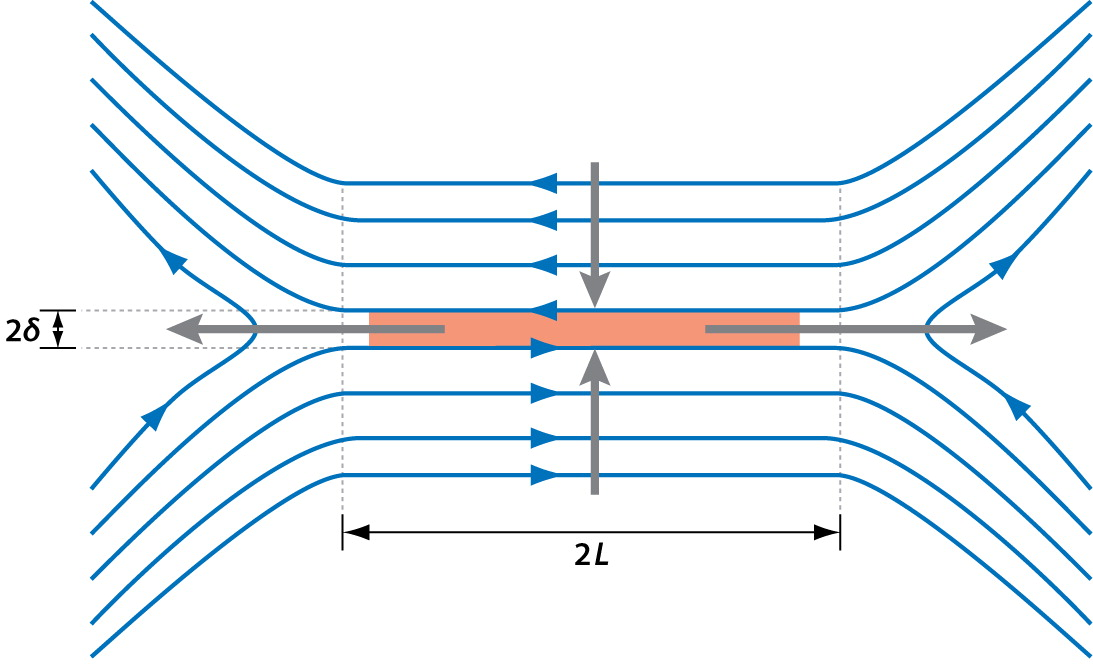

The **inertial length** for a particle species is the characteristic length scale for getting accelerated or decelerated by forces in a plasma.

When the reconnection layer thickness is shorter than the **ion inertial length**, $d_i ≡ c/ω_{pi}$, collisionless effects and the Hall effect enable reconnection to be **fast** (Zweibel & Yamada 2009).  The inner electron diffusion region has a thickness of about the **electron inertial length**, $d_i≡c/ω_{pe}$.  

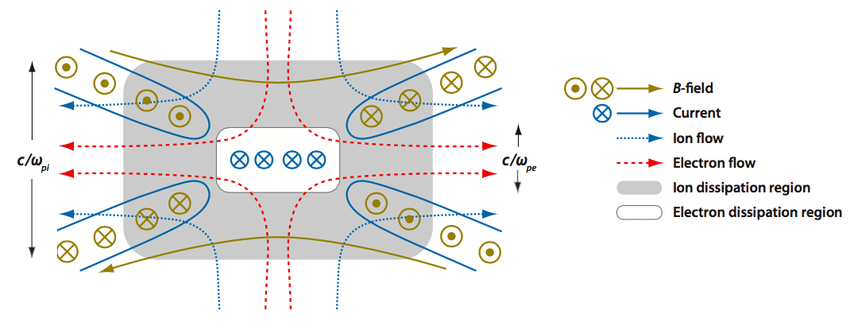

**Our goal: calculate $d_i$ and $d_e$ to get an idea of how far the MMS spacecraft should be separated from each other to investigate reconnection.**

### Length scales

Let's choose some characteristic plasma parameters for the magnetosphere.

Let's calculate the ion inertial length, $d_i$. On length scales shorter than $d_i$, the Hall effect becomes important as the ions and electrons decouple from each other.

The ion diffusion regions should therefore be a few hundred kilometers thick. Let's calculate the electron inertial length next.

The electron diffusion region should therefore have a characteristic length scale of a few kilometers, which is significantly smaller than the ion diffusion region.

We can also calculate the gyroradii for different particles 

The four *MMS* spacecraft have separations of ten to hundreds of kilometers, and thus are well-positioned to investigate Hall physics during reconnection in the magnetosphere.

#### Frequencies

We can also calculate some of the fundamental frequencies associated with magnetospheric plasma. 

### 1D Maxwellian distribution function

[`Maxwellian_1D()`]: https://docs.plasmapy.org/en/stable/api/plasmapy.formulary.distribution.Maxwellian_1D.html
[`plasmapy.formulary`]: https://docs.plasmapy.org/en/stable/formulary/index.html

Let's try out [`Maxwellian_1D()`], also from [`plasmapy.formulary`]. As a first example, let's get the probability density of finding an electron with a speed of 500 km/s if we have a plasma at a temperature of $3×10^4$ K:

Let's now plot the 1D Maxwellian distribution function for protons and alpha particles.

### Thermal Speed

[`thermal_speed()`]: ../../api/plasmapy.formulary.speeds.thermal_speed.rst#plasmapy.formulary.speeds.thermal_speed

The [`thermal_speed()`] function can be used to calculate the thermal velocity for a Maxwellian velocity distribution. There are three common definitions of the thermal velocity, which can be selected using the `method` keyword, which are defined for a 3D velocity distribution as

- `"most_probable"` <br>
$v_{th} = \sqrt{\frac{2 k_B T}{m}}$

- `"rms"` <br>
$v_{th} = \sqrt{\frac{3 k_B T}{m}}$

- `"mean_magnitude"` <br>
$v_{th} = \sqrt{\frac{8 k_B T}{m\pi}}$

The differences between these velocities can be seen by plotting them on a 3D Maxwellian speed distribution:

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(speeds / v_rms, pdf_3D, color="black", label="Maxwellian")

ax.axvline(x=v_most_prob / v_rms, color="blue", linestyle="-.", label="most probable")
ax.axvline(x=v_rms / v_rms, color="green", linestyle=":", label="RMS")
ax.axvline(x=v_mean_magnitude / v_rms, color="red", linestyle="--", label="mean magnitude")

ax.set_xlim(-0.1, 3)
ax.set_ylim(0, None)

ax.set_title("3D")
ax.set_xlabel("|v|/|v$_{rms}|$")
ax.set_ylabel("f(|v|)")

ax.legend()

plt.tight_layout()
plt.show()

### Emission of Thermal Bremsstrahlung by a Maxwellian Plasma

[Bremsstrahlung]: https://en.wikipedia.org/wiki/Bremsstrahlung
[`thermal_bremsstrahlung()`]: https://docs.plasmapy.org/en/stable/api/plasmapy.formulary.radiation.thermal_bremsstrahlung.html#thermal-bremsstrahlung

[Bremsstrahlung] is electromagnetic radiation produced by the deceleration of a charged particle when deflected by another charged particle.  

The [`thermal_bremsstrahlung()`] function calculates the bremsstrahlung spectrum emitted by the collision of electrons and ions in a thermal (Maxwellian) plasma. This function calculates this quantity in the Rayleigh-Jeans limit where $\hbar\omega \ll k_B T_e$.

 Let's start by setting the plasma density, temperature, and ion species.

Let's create an array of frequencies over which to calculate the bremsstrahlung spectrum and convert these frequencies to photon energies for the purpose of plotting the results.

Let's calculate the spectrum and then plot it.

### Coulomb logarithms

[impact parameter]: https://en.wikipedia.org/wiki/Impact_parameter

[Coulomb collisions](https://en.wikipedia.org/wiki/Coulomb_collision) are collisions between two charged particles where the interaction is governed solely by the electric fields from the two particles. Coulomb collisions usually result in small deflections of particle trajectories. The deflection angle depends on the [impact parameter] of the collision, which is the perpendicular distance between the particle's trajectory and the particle it is colliding with.  High impact parameter collisions (which result in small deflection angles) occur much more frequently than low impact parameter collisions (which result in large deflection angles).

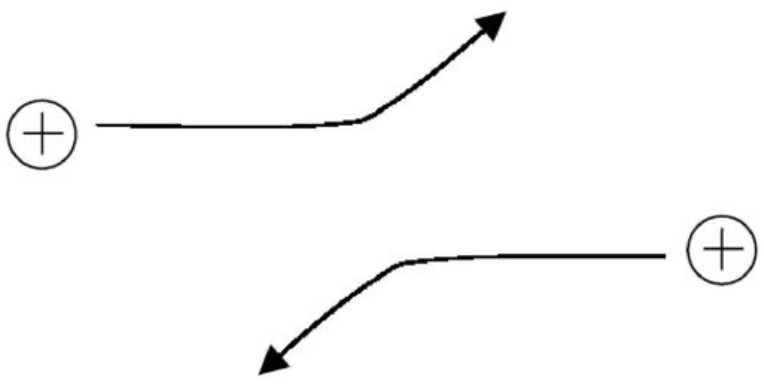

[Debye length]: https://en.wikipedia.org/wiki/Debye_length

[`impact_parameter_perp()`]: https://docs.plasmapy.org/en/stable/api/plasmapy.formulary.collisions.impact_parameter_perp.html#plasmapy.formulary.collisions.impact_parameter_perp

[`Debye_length()`]: https://docs.plasmapy.org/en/stable/api/plasmapy.formulary.lengths.Debye_length.html#plasmapy.formulary.lengths.Debye_length

[`impact_parameter()`]: https://docs.plasmapy.org/en/stable/api/plasmapy.formulary.collisions.impact_parameter.html#plasmapy.formulary.collisions.impact_parameter

[`plasmapy.formulary`]: https://docs.plasmapy.org/en/stable/formulary/index.html

[reduced mass]: https://en.wikipedia.org/wiki/Reduced_mass

The minimum and maximum impact parameters ($b_\min$ and $b_\max$, respectively) represent the range of distances of closest approach. While a typical Coulomb collision results in only a slight change in trajectory, the effects of these collisions are cumulative, and it is necessary to integrate over the range of impact parameters to account for the effects of Coulomb collisions throughout the plasma. The Coulomb logarithm accounts for the range in impact parameters for the different collisions, and is given by 
$$\ln{Λ} ≡ \ln\left(\frac{b_\max}{b_\min}\right).$$

But what should we use for the impact parameters?

Usually $b_\max$ is given by the [Debye length], $λ_D$, which can be calculated with [`Debye_length()`]. On length scales $≳ λ_D$, electric fields from individual particles get cancelled out due to screening effects. Consequently, Coulomb collisions with impact parameters $≳ λ_D$ will rarely occur. 

The inner impact parameter $b_\min$ requires more nuance. One possibility would be to set $b_\min$ to be the impact parameter corresponding to a 90° deflection angle, $ρ_⟂$, which can be calculated with [`impact_parameter_perp()`].  Alternatively, $b_\min$ could be set to be the [de Broglie wavelength](https://en.wikipedia.org/wiki/Matter_wave), $λ_{dB}$, calculated using the [reduced mass], $μ$, of the particles. Typically, $$b_\min = \max\left\{ρ_⟂, λ_{dB} \right\}.$$

The [`impact_parameter()`] function in [`plasmapy.formulary`] simultaneously calculates both $b_\min$ and $b_\max$. Let's estimate $b_\min$ and $b_\max$ for proton-electron collisions in the solar corona.

When we can calculate the Coulomb logarithm, we find that it is ∼20 (a common value for astrophysical plasma).

Our next goals are visualize the Coulomb logarithm and impact parameters for different physical conditions.  Let's start by creating a function to plot $\ln{Λ}$ against temperature.

In [ ]:
def plot_coulomb(T, n_e, species, **kwargs):
    """Plot the Coulomb logarithm and impact parameter length scales."""

    ln_Λ = Coulomb_logarithm(T, n_e, species, **kwargs)
    fig, ax = plt.subplots()
    fig.set_size_inches(3.5, 3.5)
    ax.semilogx(T, ln_Λ)
    ax.set_xlabel("T (K)")
    ax.set_ylabel("$\ln{Λ}$")
    ax.set_title("Coulomb logarithm")
    fig.tight_layout()
    fig.show()

Next we will create a function to plot $b_\min$ and $b_\max$ as functions of temperature, along with the $ρ_⟂$ and $λ_{dB}$.

In [ ]:
from astropy.constants import hbar as ℏ


def plot_impact_parameters(T, n_e, species, **kwargs):
    """Plot the minimum & maximum impact parameters for Coulomb collisions."""

    bmin, bmax = impact_parameter(T, n_e, species, **kwargs)

    μ = reduced_mass(*species)
    V_the = thermal_speed(T, "e-")
    λ_dB = ℏ / (2 * μ * V_the)

    ρ_perp = impact_parameter_perp(T, species)

    fig, ax = plt.subplots()
    fig.set_size_inches(3.5, 3.5)

    ax.loglog(T, λ_dB, "--", label="$λ_\mathrm{dB}$")
    ax.loglog(T, ρ_perp, "-.", label="$ρ_\perp$")
    ax.loglog(T, bmin, "-", label="$b_\mathrm{min}$")
    ax.loglog(T, bmax, "-", label="$b_\mathrm{max}$")

    ax.set_xlabel("T (K)")
    ax.set_ylabel("b (m)")
    ax.set_title("Impact parameters")
    ax.legend()

    fig.tight_layout()
    fig.show()

Let's now plot the Coulomb logarithm and minimum/maximum impact parameters over a range of temperatures in a dense plasma.

To investigate what is happening at the sudden change in slope, let's plot the impact parameters against temperature.

At low temperatures, $b_\min$ is $ρ_⟂$. At higher temperatures, $b_\min$ is $λ_{dB}$. What happens if we look at lower temperatures?

The Coulomb logarithm becomes negative! Let's look at the impact parameters again to understand what's happening.

This unphysical situation occurs because $b_\min > b_\max$ at low temperatures.
    
[Coulomb_logarithm]: https://docs.plasmapy.org/en/stable/api/plasmapy.formulary.collisions.Coulomb_logarithm.html#coulomb-logarithm
[Gericke, Murillo, and Schlanges (2002)]: https://doi.org/10.1103/PhysRevE.65.036418

So how should we handle this?  Fortunately, PlasmaPy's implementation of [Coulomb_logarithm] includes the methods described by [Gericke, Murillo, and Schlanges (2002)] for dense, strongly-coupled plasmas.  For most cases, we recommend using `method="hls_full_interp"` in which $b_\min$ is interpolated between $λ_{dB}$ and $ρ_⟂$, and $b_\max$ is interpolated between $λ_D$ and the ion sphere radius: 

$$a_i ≡ \left(\frac{3}{4} π n_i\right)^{⅓}$$    

The Coulomb logarithm approaches zero as the temperature decreases, and does not become unphysically negative. This is the expected behavior, although there is increased uncertainty for Coulomb logarithms $≲4$.

And that's it for PlasmaPy!  Thank for you staying (or at least scrolling) to the end!